In [1]:
import pandas as pd
import numpy as np
import os
import string
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
from matplotlib.ticker import StrMethodFormatter

<span style="font-family: verdana; color: green; font-size: 20px;font-weight: bold;">Data from 2010 to 2022</span>

In [2]:
file_path = '../../../data/raw/2022-DVMT-Comparison.xlsx'

# Read all sheets into a dictionary of DataFrames
xls = pd.ExcelFile(file_path)
sheet_names = ['2022', '2021','2020', '2019','2018', '2017','2016', '2015','2014', '2013','2012', '2011','2010']
              #'2009', '2008','2007', '2006','2005', '2004','2003', '2002','2001', '2000'] 
dataframes = {sheet_name: xls.parse(sheet_name) for sheet_name in sheet_names}

# Define the number of rows to delete from the beginning
rows_to_delete =2

# Modify each DataFrame to remove the first 'rows_to_delete' rows
for sheet_name, df in dataframes.items():
    dataframes[sheet_name] = df.iloc[rows_to_delete:]
    
# Define a function to remove rows with all NaN values
def remove_rows_with_nan(df):
    return df.dropna(how='all') 

# remove rows that only has NAN
for sheet_name, df in dataframes.items():
    dataframes[sheet_name] = remove_rows_with_nan(df)

# Replace NaN with blank ('')
for sheet_name, df in dataframes.items():
    dataframes[sheet_name] = df.fillna('')  

# Define which row to use as the index (e.g., row 0)
row_index_to_use = 0

# Set the specified row as column names
for sheet_name, df in dataframes.items():
    dataframes[sheet_name] = df.iloc[row_index_to_use + 1:]  # Skip the specified row
    dataframes[sheet_name].columns = df.iloc[row_index_to_use]  # Set the specified row as column names
    dataframes[sheet_name].reset_index(drop=True, inplace=True)   
    
# Define a column in all the datasheet to extract
common_column_name = 'TOTAL'  # Replace with the actual column name

# Create a new DataFrame to store the extracted data in separate columns
combined_data = pd.DataFrame()

# Extract the data from each sheet and put it in a separate column in combined_data
for sheet_name, df in dataframes.items():
    if common_column_name in df.columns:
        extracted_column  = df[common_column_name]
        combined_data[sheet_name] = extracted_column
        

# Reset the index for both DataFrames
combined_data.reset_index(drop=True, inplace=True)


# Insert the Series as the first and second columns in the DataFrame
df_name=dataframes['2015'].iloc[:,0]
df_types=dataframes['2015'].iloc[:,1]
combined_data.insert(0, 'Area', df_name)
combined_data.insert(1, 'Parameter', df_types)

combined_data.iat[4, 0] = "BRIDGEPORT-STAMFORD"
combined_data.iat[5, 0] = " "
combined_data.iat[12, 0] = "NEW YORK-NEWARK"
combined_data.iat[13, 0] = " "
combined_data.iat[14, 0] = "NORWICH-NEW LONDON"
combined_data.iat[15, 0] = " "

#times the dvmt value with 1000 in year 2010
for i in range(0,25):
    if i%2!=0:
        combined_data.loc[i, '2010'] *= 1000

<span style="font-family: verdana; color: green; font-size: 20px;font-weight: bold;">Data from 2002 to 2009</span>

In [3]:
#clean and attached the data from year 2002 to 2009
xls = pd.ExcelFile(file_path)
sheet_names_1 = ['2009', '2008','2007', '2006','2005', '2004','2003', '2002']
dataframes_1 = {sheet_name: xls.parse(sheet_name) for sheet_name in sheet_names_1}

# Define the number of rows to delete from the beginning
rows_to_delete_1 =2

# Modify each DataFrame to remove the first 'rows_to_delete' rows
for sheet_name, df in dataframes_1.items():
    dataframes_1[sheet_name] = df.iloc[rows_to_delete:]
    
# Define a function to remove rows with all NaN values
def remove_rows_with_nan(df):
    return df.dropna(how='all') 

for sheet_name, df in dataframes_1.items():
    dataframes_1[sheet_name] = remove_rows_with_nan(df)
    
for sheet_name, df in dataframes_1.items():
    dataframes_1[sheet_name] = df.fillna('')  # Replace NaN with blank ('')

# Define which row to use as the index (e.g., row 0)
row_index_to_use = 0

# Apply the function to each DataFrame in the dictionary
for sheet_name, df in dataframes_1.items():
    dataframes_1[sheet_name] = df.iloc[row_index_to_use + 1:]  # Skip the specified row
    dataframes_1[sheet_name].columns = df.iloc[row_index_to_use]  # Set the specified row as column names
    dataframes_1[sheet_name].reset_index(drop=True, inplace=True)   
    
for sheet_name, df in dataframes_1.items():
    dataframes_1[sheet_name] =  dataframes_1[sheet_name].drop([2,3,24,25,26,27,28])
    dataframes_1[sheet_name].reset_index(drop=True, inplace=True)

# Define a common column name to extract
common_column_name = 'TOTAL'  # Replace with the actual column name

# Create a new DataFrame to store the extracted data in separate columns
combined_data_1 = pd.DataFrame()

# Extract the data from each sheet and put it in a separate column in combined_data
for sheet_name, df in dataframes_1.items():
    if common_column_name in df.columns:
        extracted_column  = df[common_column_name]
        combined_data_1[sheet_name] = extracted_column

df_name_1=dataframes_1['2002'].iloc[:,0]
df_types_1=dataframes_1['2002'].iloc[:,1]

# Reset the index for both DataFrames
combined_data_1.reset_index(drop=True, inplace=True)


# Insert the Series as the first and second columns in the DataFrame
#combined_data_1.insert(0, 'Area', df_name)
#combined_data_1.insert(1, 'Parameter', df_types)

for i in range(0,25):
    if i%2!=0:
        combined_data_1.loc[i,:]=combined_data_1.loc[i,:]*1000

In [4]:
result1 = pd.concat([combined_data, combined_data_1], axis=1)

<span style="font-family: verdana; color: green; font-size: 20px;font-weight: bold;">Data from 1990 to 2001</span>

In [5]:
#clean and attached the data from year 1999 to 2001
xls = pd.ExcelFile(file_path)
sheet_names_4 = ['2001','2000','1999']
#,'2001', '2000','1999'] 
dataframes_4 = {sheet_name: xls.parse(sheet_name) for sheet_name in sheet_names_4}

# Define the number of rows to delete from the beginning
rows_to_delete=2

# Modify each DataFrame to remove the first 'rows_to_delete' rows
for sheet_name, df in dataframes_4.items():
    dataframes_4[sheet_name] = df.iloc[rows_to_delete:]
    
# Define a function to remove rows with all NaN values
def remove_rows_with_nan(df):
    return df.dropna(how='all') 

for sheet_name, df in dataframes_4.items():
    dataframes_4[sheet_name] = remove_rows_with_nan(df)
    
for sheet_name, df in dataframes_4.items():
    dataframes_4[sheet_name] = df.fillna('')  # Replace NaN with blank ('')

    # Define which row to use as the index (e.g., row 0)
row_index_to_use = 0

# Apply the function to each DataFrame in the dictionary
for sheet_name, df in dataframes_4.items():
    dataframes_4[sheet_name] = df.iloc[row_index_to_use + 1:]  # Skip the specified row
    dataframes_4[sheet_name].columns = df.iloc[row_index_to_use]  # Set the specified row as column names
    dataframes_4[sheet_name].reset_index(drop=True, inplace=True)   
    
for sheet_name, df in dataframes_4.items():
    dataframes_4[sheet_name] =  dataframes_4[sheet_name].drop([2,3,30,31,32,33,34])
    dataframes_4[sheet_name].reset_index(drop=True, inplace=True)

# Define a common column name to extract
common_column_name = 'TOTAL'  # Replace with the actual column name

# Create a new DataFrame to store the extracted data in separate columns
combined_data_4 = pd.DataFrame()

# Extract the data from each sheet and put it in a separate column in combined_data
for sheet_name, df in dataframes_4.items():
    if common_column_name in df.columns:
        extracted_column  = df[common_column_name]
        combined_data_4[sheet_name] = extracted_column

#df_name_1=dataframes_1['2001'].iloc[:,0]
#df_types_1=dataframes_1['2001'].iloc[:,1]

# Reset the index for both DataFrames
combined_data_4.reset_index(drop=True, inplace=True)


# Insert the Series as the first and second columns in the DataFrame
#combined_data_1.insert(0, 'Area', df_name)
#combined_data_1.insert(1, 'Parameter', df_types)
for i in range(0,30):
    if i%2!=0:
        combined_data_4.loc[i,:]=combined_data_4.loc[i,:]*1000
        
# Insert the Series as the first and second columns in the DataFrame
df_name2=dataframes_4['1999'].iloc[:,0]
df_types2=dataframes_4['1999'].iloc[:,1]
combined_data_4 .insert(0, 'Area', df_name2)
combined_data_4 .insert(1, 'Parameter', df_types2)

In [6]:
#extract the data from 1994 to 1998
xls = pd.ExcelFile(file_path)
sheet_names_2 = ['1998','1997','1996']
                 #'1993 ','1992','1991','1990','1989','1988','1987','1986','1985','1984','1983','1982','1981','1980'] 
dataframes_2 = {sheet_name: xls.parse(sheet_name) for sheet_name in sheet_names_2}

# Define a function to remove rows with all NaN values
def remove_rows_with_nan(df):
    return df.dropna(how='all') 

for sheet_name, df in dataframes_2.items():
    dataframes_2[sheet_name] = remove_rows_with_nan(df)
    
for sheet_name, df in dataframes_2.items():
    dataframes_2[sheet_name] = df.fillna('')  # Replace NaN with blank ('')
    
# Define which row to use as the index (e.g., row 0)
row_index_to_use = 0

# Apply the function to each DataFrame in the dictionary
for sheet_name, df in dataframes_2.items():
    dataframes_2[sheet_name] = df.iloc[row_index_to_use + 1:]  # Skip the specified row
    dataframes_2[sheet_name].columns = df.iloc[row_index_to_use]  # Set the specified row as column names
    dataframes_2[sheet_name].reset_index(drop=True, inplace=True)  
    
for sheet_name, df in dataframes_2.items():
    dataframes_2[sheet_name] =  dataframes_2[sheet_name].drop([2,3,30,31,32,33,34])
    dataframes_2[sheet_name].reset_index(drop=True, inplace=True)

    
# Define a common column name to extract
common_column_name = 'TOTAL'  # Replace with the actual column name

# Create a new DataFrame to store the extracted data in separate columns
combined_data_2 = pd.DataFrame()

# Extract the data from each sheet and put it in a separate column in combined_data
for sheet_name, df in dataframes_2.items():
    if common_column_name in df.columns:
        extracted_column  = df[common_column_name]
        combined_data_2[sheet_name] = extracted_column
combined_data_2

df_name_2=dataframes_2['1998'].iloc[:,0]
df_types_2=dataframes_2['1998'].iloc[:,1]

# Reset the index for both DataFrames
combined_data_2.reset_index(drop=True, inplace=True)


# Insert the Series as the first and second columns in the DataFrame
#combined_data_1.insert(0, 'Area', df_name)
#combined_data_1.insert(1, 'Parameter', df_types)

for i in range(0,33):
    if i%2!=0:
        combined_data_2.loc[i,:]=combined_data_2.loc[i,:]*1000

In [7]:
xls = pd.ExcelFile(file_path)
sheet_names_95 = ['1995']
                 #'1993 ','1992','1991','1990','1989','1988','1987','1986','1985','1984','1983','1982','1981','1980'] 
dataframes_95 = {sheet_name: xls.parse(sheet_name) for sheet_name in sheet_names_95}


# Define a function to remove rows with all NaN values
def remove_rows_with_nan(df):
    return df.dropna(how='all') 

for sheet_name, df in dataframes_95.items():
    dataframes_95[sheet_name] = remove_rows_with_nan(df)
    
for sheet_name, df in dataframes_95.items():
    dataframes_95[sheet_name] = df.fillna('')  # Replace NaN with blank ('')
    
# Define which row to use as the index (e.g., row 0)
row_index_to_use = 1

# Apply the function to each DataFrame in the dictionary
for sheet_name, df in dataframes_95.items():
    dataframes_95[sheet_name] = df.iloc[row_index_to_use + 1:]  # Skip the specified row
    dataframes_95[sheet_name].columns = df.iloc[row_index_to_use]  # Set the specified row as column names
    dataframes_95[sheet_name].reset_index(drop=True, inplace=True) 
    
for sheet_name, df in dataframes_95.items():
    dataframes_95[sheet_name] =  dataframes_95[sheet_name].drop([2,3,30,31,32,33,34])
    dataframes_95[sheet_name].reset_index(drop=True, inplace=True)
    
# Define a common column name to extract
common_column_name = 'TOTAL'  # Replace with the actual column name

# Create a new DataFrame to store the extracted data in separate columns
combined_data_95 = pd.DataFrame()

# Extract the data from each sheet and put it in a separate column in combined_data
for sheet_name, df in dataframes_95.items():
    if common_column_name in df.columns:
        extracted_column  = df[common_column_name]
        combined_data_95[sheet_name] = extracted_column

# Reset the index for both DataFrames
combined_data_95.reset_index(drop=True, inplace=True)

for i in range(0,33):
    if i%2!=0:
        combined_data_95.loc[i,:]=combined_data_95.loc[i,:]*1000

In [8]:
#extract the data from 1994 
xls = pd.ExcelFile(file_path)
sheet_names_94 = ['1994 ']
                 #'1993 ','1992','1991','1990','1989','1988','1987','1986','1985','1984','1983','1982','1981','1980'] 
dataframes_94 = {sheet_name: xls.parse(sheet_name) for sheet_name in sheet_names_94}

# Define a function to remove rows with all NaN values
def remove_rows_with_nan(df):
    return df.dropna(how='all') 

for sheet_name, df in dataframes_94.items():
    dataframes_94[sheet_name] = remove_rows_with_nan(df)
    
for sheet_name, df in dataframes_94.items():
    dataframes_94[sheet_name] = df.fillna('')  # Replace NaN with blank ('')
    
# Define which row to use as the index (e.g., row 0)
row_index_to_use = 0

# Apply the function to each DataFrame in the dictionary
for sheet_name, df in dataframes_94.items():
    dataframes_94[sheet_name] = df.iloc[row_index_to_use + 1:]  # Skip the specified row
    dataframes_94[sheet_name].columns = df.iloc[row_index_to_use]  # Set the specified row as column names
    dataframes_94[sheet_name].reset_index(drop=True, inplace=True)  
    
for sheet_name, df in dataframes_94.items():
    dataframes_94[sheet_name] =  dataframes_94[sheet_name].drop([2,3,30,31,32,33,34])
    dataframes_94[sheet_name].reset_index(drop=True, inplace=True)

    
# Define a common column name to extract
common_column_name = 'TOTAL'  # Replace with the actual column name

# Create a new DataFrame to store the extracted data in separate columns
combined_data_94 = pd.DataFrame()

# Extract the data from each sheet and put it in a separate column in combined_data
for sheet_name, df in dataframes_94.items():
    if common_column_name in df.columns:
        extracted_column  = df[common_column_name]
        combined_data_94[sheet_name] = extracted_column


# Reset the index for both DataFrames
combined_data_94.reset_index(drop=True, inplace=True)

for i in range(0,33):
    if i%2!=0:
        combined_data_94.loc[i,:]=combined_data_94.loc[i,:]*1000

In [9]:
#extract the data at 1993
xls = pd.ExcelFile(file_path)
sheet_names_5 = ['1993 ']
                 #'1993 ','1992','1991','1990','1989','1988','1987','1986','1985','1984','1983','1982','1981','1980'] 
dataframes_5 = {sheet_name: xls.parse(sheet_name) for sheet_name in sheet_names_5}

#rows_to_delete_1 =0


# Modify each DataFrame to remove the first 'rows_to_delete' rows
#for sheet_name, df in dataframes_2.items():
    #dataframes_2[sheet_name] = df.iloc[rows_to_delete:]
    
# Define a function to remove rows with all NaN values
def remove_rows_with_nan(df):
    return df.dropna(how='all') 

for sheet_name, df in dataframes_5.items():
    dataframes_5[sheet_name] = remove_rows_with_nan(df)
    
for sheet_name, df in dataframes_5.items():
    dataframes_5[sheet_name] = df.fillna('')  # Replace NaN with blank ('')
    
# Define which row to use as the index (e.g., row 0)
row_index_to_use = 0

# Apply the function to each DataFrame in the dictionary
for sheet_name, df in dataframes_5.items():
    dataframes_5[sheet_name] = df.iloc[row_index_to_use + 1:]  # Skip the specified row
    dataframes_5[sheet_name].columns = df.iloc[row_index_to_use]  # Set the specified row as column names
    dataframes_5[sheet_name].reset_index(drop=True, inplace=True)  

for sheet_name, df in dataframes_5.items():
    dataframes_5[sheet_name] =  dataframes_5[sheet_name].drop([2,5,8,13,16,19,22,25,28,31,38,39,40,41,42,43,44])
    dataframes_5[sheet_name].reset_index(drop=True, inplace=True)
    
# Define a common column name to extract
common_column_name = 'TOTAL'  # Replace with the actual column name

# Create a new DataFrame to store the extracted data in separate columns
combined_data_5 = pd.DataFrame()

# Extract the data from each sheet and put it in a separate column in combined_data
for sheet_name, df in dataframes_5.items():
    if common_column_name in df.columns:
        extracted_column  = df[common_column_name]
        combined_data_5[sheet_name] = extracted_column


# Reset the index for both DataFrames
combined_data_5.reset_index(drop=True, inplace=True)


# Insert the Series as the first and second columns in the DataFrame
#combined_data_1.insert(0, 'Area', df_name)
#combined_data_1.insert(1, 'Parameter', df_types)

for i in range(0,30):
    if i%2!=0:
        combined_data_5.loc[i,:]=combined_data_5.loc[i,:]*1000

In [10]:
#extract the data from 1992 to 1990
xls = pd.ExcelFile(file_path)
sheet_names_3 = ['1992','1991','1990','1989','1988','1987','1986','1985','1984','1983','1982','1981'] 
dataframes_3 = {sheet_name: xls.parse(sheet_name) for sheet_name in sheet_names_3}

#rows_to_delete_1 =0


# Modify each DataFrame to remove the first 'rows_to_delete' rows
#for sheet_name, df in dataframes_2.items():
    #dataframes_2[sheet_name] = df.iloc[rows_to_delete:]
    
# Define a function to remove rows with all NaN values
def remove_rows_with_nan(df):
    return df.dropna(how='all') 

for sheet_name, df in dataframes_3.items():
    dataframes_3[sheet_name] = remove_rows_with_nan(df)
    
for sheet_name, df in dataframes_3.items():
    dataframes_3[sheet_name] = df.fillna('')  # Replace NaN with blank ('')
    
# Define which row to use as the index (e.g., row 0)
row_index_to_use = 0

# Apply the function to each DataFrame in the dictionary
for sheet_name, df in dataframes_3.items():
    dataframes_3[sheet_name] = df.iloc[row_index_to_use + 1:]  # Skip the specified row
    dataframes_3[sheet_name].columns = df.iloc[row_index_to_use]  # Set the specified row as column names
    dataframes_3[sheet_name].reset_index(drop=True, inplace=True)  
    
for sheet_name, df in dataframes_3.items():
    dataframes_3[sheet_name] =  dataframes_3[sheet_name].drop([2,3,30,31,32,33,34,35])
    dataframes_3[sheet_name].reset_index(drop=True, inplace=True)
    
# Define a common column name to extract
common_column_name = 'TOTAL'  # Replace with the actual column name

# Create a new DataFrame to store the extracted data in separate columns
combined_data_3 = pd.DataFrame()

# Extract the data from each sheet and put it in a separate column in combined_data
for sheet_name, df in dataframes_3.items():
    if common_column_name in df.columns:
        extracted_column  = df[common_column_name]
        combined_data_3[sheet_name] = extracted_column


# Reset the index for both DataFrames
combined_data_3.reset_index(drop=True, inplace=True)


# Insert the Series as the first and second columns in the DataFrame
#combined_data_1.insert(0, 'Area', df_name)
#combined_data_1.insert(1, 'Parameter', df_types)

for i in range(0,32):
    if i%2!=0:
        combined_data_3.loc[i,:]=combined_data_3.loc[i,:]*1000

In [11]:
#combine year 2001 to 1990
result2 = pd.concat([combined_data_4, combined_data_2, combined_data_95, combined_data_94, combined_data_5, combined_data_3], axis=1)

In [12]:
result1.to_csv('../../../data/tidy/vmt-urbanized-area-2002to2022.csv')
result2.to_csv('../../../data/tidy/vmt-urbanized-area-1990to2001.csv')

In [13]:
#get the total DVMT data for year 1966 to 1980
xls = pd.ExcelFile(file_path)
sheet_names = ['1980','OLD DVMT']
dataframes = {sheet_name: xls.parse(sheet_name) for sheet_name in sheet_names}

DVMT_1980 = dataframes['1980'].iat[40,-1]*1000

DVMT_1966to1979 = dataframes['OLD DVMT'].copy()  # Make a copy to avoid modifying the original DataFrame

# Multiply the values in the second column by 1000
DVMT_1966to1979.iloc[:, 1] *= 1000

DVMT_1966to1979 = DVMT_1966to1979.iloc[2:16] 

In [14]:
row_index = 23  # Index of the row you want to extract
start_column_index = 2  # Index of the third column (0-based indexing)

# Extract values from the specified row and from the third column to the end
value1 = result1.iloc[23, 2:]
value2 = result2.iloc[29, 2:]

In [15]:
year1 = value1.index.tolist()
dvmt1 = value1.values.tolist()
year1 = [int(year) for year in year1]

year2 = value2.index.tolist()
dvmt2 = value2.values.tolist()
year2 = [int(year) for year in year2]

dvmt3 = DVMT_1966to1979['OLD DVMT TOTAL '].values.tolist()
year3 = DVMT_1966to1979['Unnamed: 0'].values.tolist()


<span style="font-family: verdana; color: green; font-size: 20px;font-weight: bold;">Plot VMT changes over years</span>

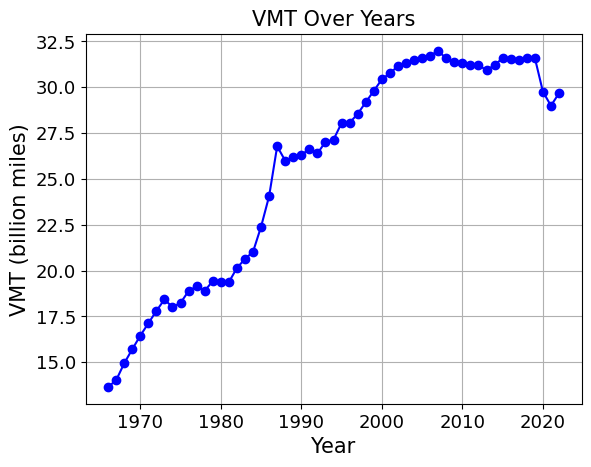

In [78]:
combined_year = year1 + year2 + [1980]+ year3 
combined_dvmt = dvmt1 + dvmt2 +[DVMT_1980]+dvmt3
combined_dvmt_int = [int(x) for x in combined_dvmt]

# Perform element-wise division to convert the unit into million unit
combined_dvmt_divided = [x*365 / 1000000000 for x in combined_dvmt_int]

# Plot DVMT against years
plt.plot(combined_year, combined_dvmt_divided, marker='o', color='b', linestyle='-')

# Set labels and title
plt.xlabel('Year',fontsize=15)
plt.ylabel('VMT (billion miles)',fontsize=15)
plt.title('VMT Over Years',fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

# Show grid
plt.grid(True)

# Save or display the plot
plt.savefig('../../../figures/CT-dvmt.png', dpi=600, bbox_inches='tight')

In [17]:
#rural area
rural_2002to2022 = result1.iloc[1,2:]
rural_1981to2001 = result2.iloc[1,2:]
rural_1980 = dataframes['1980'].iat[3,-1]*1000

rural1_year = rural_2002to2022.index.tolist()
rural1 = rural_2002to2022.values.tolist()
rural1_year = [int(year) for year in rural1_year]

rural2_year = rural_1981to2001.index.tolist()
rural2 = rural_1981to2001.values.tolist()
rural2_year = [int(year) for year in rural2_year]

In [18]:
#urban cluster
uc_2002to2022 = result1.iloc[3,2:]
uc_1981to2001 = result2.iloc[3,2:]
uc_1980 = dataframes['1980'].iat[9,-1]*1000

uc1_year = uc_2002to2022.index.tolist()
uc1 = uc_2002to2022.values.tolist()
uc1_year = [int(year) for year in uc1_year]

uc2_year = uc_1981to2001.index.tolist()
uc2 = uc_1981to2001.values.tolist()
uc2_year = [int(year) for year in uc2_year]

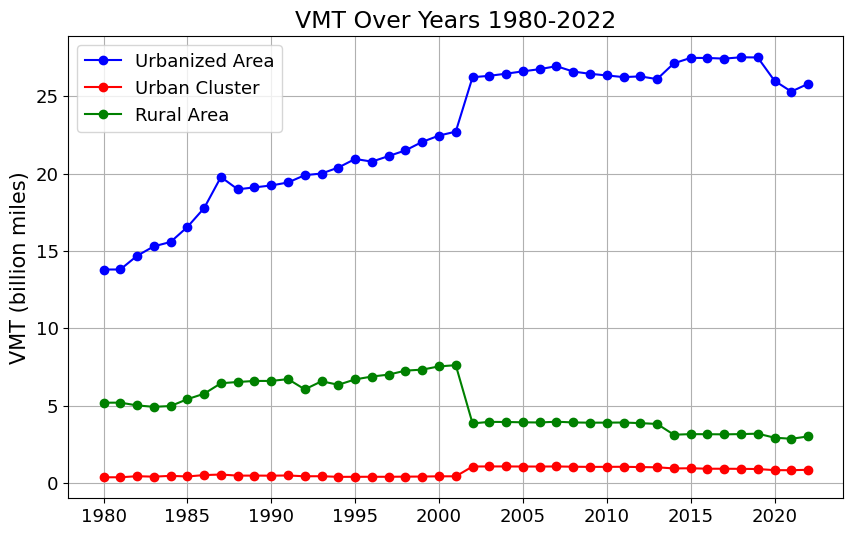

In [19]:
rural = rural1  + rural2+ [rural_1980]
urbancuster = uc1  + uc2+ [uc_1980]
total = dvmt1 + dvmt2 +[DVMT_1980]
urbanized = [x - y - z for x, y, z in zip(total, urbancuster, rural)]
years = year1 + year2 + [1980]

# Perform element-wise division to convert the unit into million unit
urbanized = [x*365 / 1000000000 for x in urbanized]
urbancuster  = [x*365 / 1000000000 for x in urbancuster]
rural = [x*365 / 1000000000 for x in rural]


plt.figure(figsize=(10, 6)) 
# Plot DVMT against years
plt.plot(years, urbanized, marker='o', color='b', linestyle='-', label='Urbanized Area')
plt.plot(years, urbancuster, marker='o', color='r', linestyle='-', label='Urban Cluster')
plt.plot(years, rural, marker='o', color='g', linestyle='-', label='Rural Area')

# Set labels and title
#plt.xlabel('Year',fontsize=20)
plt.ylabel('VMT (billion miles)',fontsize=15)
plt.title('VMT Over Years 1980-2022',fontsize=17)
plt.xticks(fontsize=13)
plt.xticks(np.arange(min(years), max(years)+1, 5)) 
plt.yticks(fontsize=13)
plt.legend(fontsize=13)

# Show grid
plt.grid(True)

# Save or display the plot
plt.savefig('../../../figures/CT-vmt.png', dpi=600, bbox_inches='tight')

<span style="font-family: verdana; color: green; font-size: 20px;font-weight: bold;">Calculate the VMT of three MSA based on existing data</span>

In [20]:
#import the portion of ua,uc,ra in MSA
propo = pd.read_csv('../../../results/proportion_ua_uc_ra.csv')

In [21]:
propo = propo.drop(propo.columns[0], axis=1)
propo

,Area,UA,UC,RA
0,New Haven,0.249628,0.000000,0.055830
1,Hartford,0.357295,0.340877,0.284849
2,Bridgeport,0.253795,0.000000,0.063588


In [22]:
#unit of vmt here is billion
def msa_urbanized(vmt, ratio):
    vmt = np.array(vmt)
    msa_vmt = vmt*ratio
    return msa_vmt

NHM_UA_VMT = msa_urbanized(urbanized, propo.at[0, 'UA'] )
HEM_UA_VMT = msa_urbanized(urbanized, propo.at[1, 'UA'] )
BSN_UA_VMT = msa_urbanized(urbanized, propo.at[2, 'UA'] )

def msa_urbancluster(vmt, ratio):
    vmt = np.array(vmt)
    msa_vmt = vmt*ratio
    return msa_vmt

NHM_UC_VMT = msa_urbancluster(urbancuster, propo.at[0, 'UC'] )
HEM_UC_VMT = msa_urbancluster(urbancuster, propo.at[1, 'UC'] )
BSN_UC_VMT = msa_urbancluster(urbancuster, propo.at[2, 'UC'] )

def msa_rural(vmt, ratio):
    vmt = np.array(vmt)
    msa_vmt = vmt*ratio
    return msa_vmt

NHM_RA_VMT = msa_rural(rural, propo.at[0, 'RA'] )
HEM_RA_VMT = msa_rural(rural, propo.at[1, 'RA'] )
BSN_RA_VMT = msa_rural(rural, propo.at[2, 'RA'] )

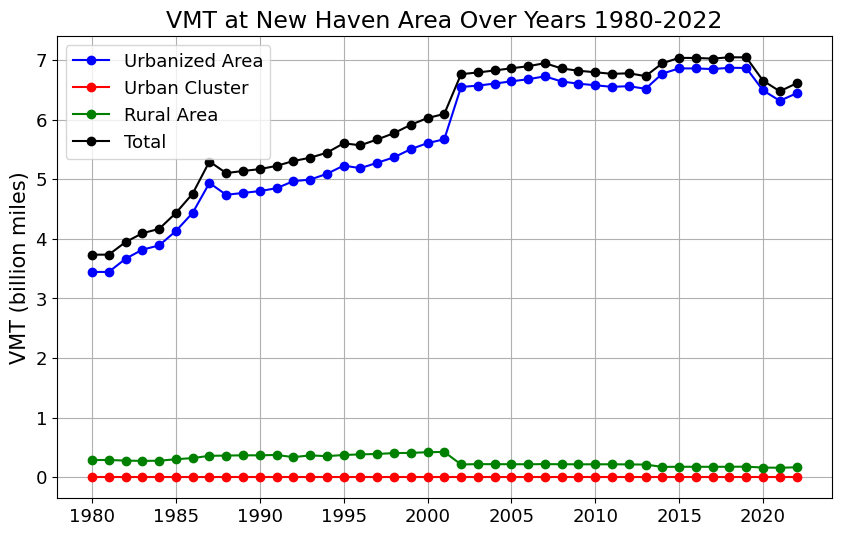

In [23]:
plt.figure(figsize=(10, 6)) 
# Plot DVMT against years
plt.plot(years, NHM_UA_VMT, marker='o', color='b', linestyle='-', label='Urbanized Area')
plt.plot(years, NHM_UC_VMT, marker='o', color='r', linestyle='-', label='Urban Cluster')
plt.plot(years, NHM_RA_VMT, marker='o', color='g', linestyle='-', label='Rural Area')

total_VMT_NHM = NHM_UA_VMT + NHM_UC_VMT + NHM_RA_VMT
plt.plot(years, total_VMT_NHM, marker='o', color='k', linestyle='-', label='Total')

# Set labels and title
#plt.xlabel('Year',fontsize=20)
plt.ylabel('VMT (billion miles)',fontsize=15)
plt.title('VMT at New Haven Area Over Years 1980-2022',fontsize=17)
plt.xticks(fontsize=13)
plt.xticks(np.arange(min(years), max(years)+1, 5)) 
plt.yticks(fontsize=13)
plt.legend(fontsize=13)

# Show grid
plt.grid(True)

# Save or display the plot
plt.savefig('../../../figures/NHM-vmt.png', dpi=600, bbox_inches='tight')

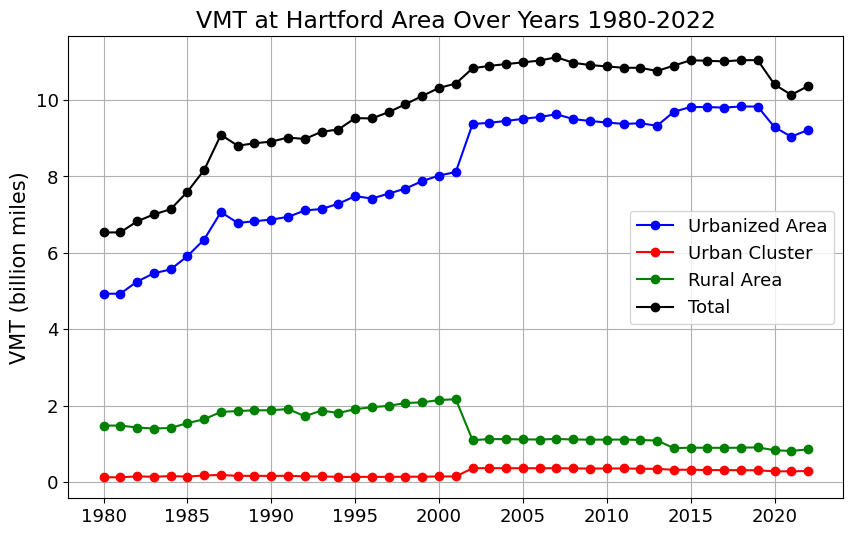

In [24]:
plt.figure(figsize=(10, 6)) 
# Plot DVMT against years
plt.plot(years, HEM_UA_VMT, marker='o', color='b', linestyle='-', label='Urbanized Area')
plt.plot(years, HEM_UC_VMT, marker='o', color='r', linestyle='-', label='Urban Cluster')
plt.plot(years, HEM_RA_VMT, marker='o', color='g', linestyle='-', label='Rural Area')

total_VMT_HEM = HEM_UA_VMT + HEM_UC_VMT + HEM_RA_VMT
plt.plot(years, total_VMT_HEM, marker='o', color='k', linestyle='-', label='Total')

# Set labels and title
#plt.xlabel('Year',fontsize=20)
plt.ylabel('VMT (billion miles)',fontsize=15)
plt.title('VMT at Hartford Area Over Years 1980-2022',fontsize=17)
plt.xticks(fontsize=13)
plt.xticks(np.arange(min(years), max(years)+1, 5)) 
plt.yticks(fontsize=13)
plt.legend(fontsize=13)

# Show grid
plt.grid(True)

# Save or display the plot
plt.savefig('../../../figures/HEM-vmt.png', dpi=600, bbox_inches='tight')

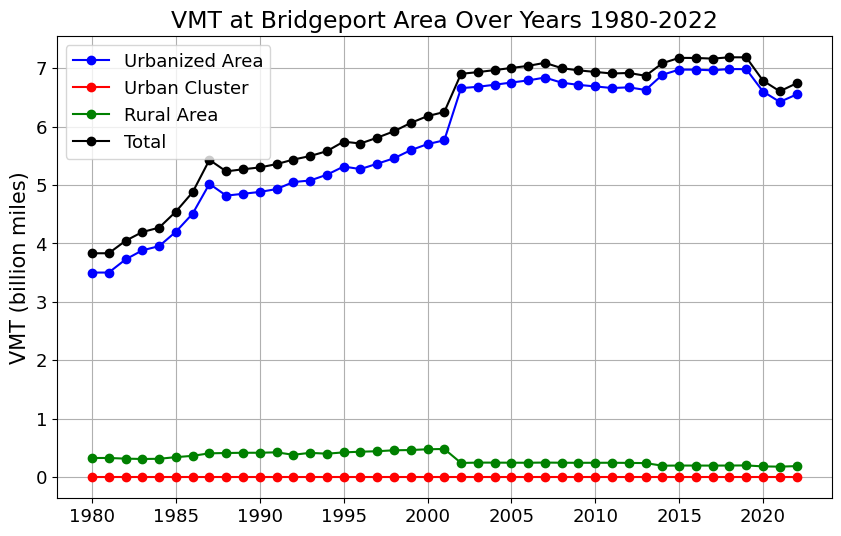

In [25]:
plt.figure(figsize=(10, 6)) 
# Plot DVMT against years
plt.plot(years, BSN_UA_VMT, marker='o', color='b', linestyle='-', label='Urbanized Area')
plt.plot(years, BSN_UC_VMT, marker='o', color='r', linestyle='-', label='Urban Cluster')
plt.plot(years, BSN_RA_VMT, marker='o', color='g', linestyle='-', label='Rural Area')

total_VMT_BSN = BSN_UA_VMT + BSN_UC_VMT + BSN_RA_VMT
plt.plot(years, total_VMT_BSN, marker='o', color='k', linestyle='-', label='Total')

# Set labels and title
#plt.xlabel('Year',fontsize=20)
plt.ylabel('VMT (billion miles)',fontsize=15)
plt.title('VMT at Bridgeport Area Over Years 1980-2022',fontsize=17)
plt.xticks(fontsize=13)
plt.xticks(np.arange(min(years), max(years)+1, 5)) 
plt.yticks(fontsize=13)
plt.legend(fontsize=13)

# Show grid
plt.grid(True)

# Save or display the plot
plt.savefig('../../../figures/BSN-vmt.png', dpi=600, bbox_inches='tight')

In [26]:
total_VMT_BSN

array([6.74055826, 6.60419911, 6.78627764, 7.18484472, 7.18592515,
       7.1630263 , 7.17432315, 7.17556676, 7.08407847, 6.86937731,
       6.91756826, 6.90845824, 6.9352817 , 6.96182116, 6.99971098,
       7.09117181, 7.03866376, 7.00332497, 6.96662129, 6.93213882,
       6.902667  , 6.24967402, 6.17932994, 6.06262674, 5.91938061,
       5.80987323, 5.71052762, 5.74225262, 5.57962946, 5.49571035,
       5.43570251, 5.35763388, 5.30143447, 5.26947493, 5.23377802,
       5.43033843, 4.87774486, 4.54497331, 4.27094303, 4.19576237,
       4.04605357, 3.83320301, 3.83243811])

In [77]:
# Create a dictionary to store the data
data = {
    'Year': years,
    'New Haven VMT (billion miles)': total_VMT_NHM,
    'Hartford VMT (billion miles)': total_VMT_HEM,
    'Bridgeport VMT (billion miles)': total_VMT_BSN
}

df_VMT_MSA = pd.DataFrame(data)
df_VMT_MSA.to_csv('../../../results/historical_VMT_msa.csv', index=False)

<span style="font-family: verdana; color: green; font-size: 20px;font-weight: bold;">Estimating the VMT based on data 2022</span>

In [34]:
#the other five towns are also counted in
vmt=pd.read_csv('../../../results/mobile-emissions-breakdown-activity-emissions.csv')
vmt

,Unnamed: 0,MSA,County,Population,VMT (billion miles),N2O Emissions(TMTCO2e),CH4 Emissions (TMTCO2e),CO2 Emissions(MMTCO2e),GHG Emissions(MMTCO2e)
0,0,New Haven Area,New Haven,864751,6.911885,7.046291,0.661296,2.867682,2.875389
1,1,Hartford Area,"Hartford, Middlesex,Tolland",1238888,10.469413,10.672997,1.001664,4.343670,4.355344
2,2,Bridgeport Area,Fairfield,986344,7.136784,7.275563,0.682814,2.960991,2.968949
3,3,Total,Total,3605330,29.666315,30.243196,30.243196,12.308300,12.368787


In [41]:
#ratio of VMT of urbanized area to that of MSA in 2022
VMT_NHM_2022=vmt.iat[0, 4]
VMT_HEM_2022=vmt.iat[1, 4]
VMT_BSN_2022=vmt.iat[2, 4]
VMT_CT_2022=combined_dvmt_divided[0]
    
ratio=[VMT_NHM_2022/VMT_CT_2022,VMT_HEM_2022/VMT_CT_2022,VMT_BSN_2022/VMT_CT_2022]

In [60]:
combined_dvmt_divided = np.array(combined_dvmt_divided)
vmt_NHM = (ratio[0]*combined_dvmt_divided).tolist()
vmt_HEM = (ratio[1]*combined_dvmt_divided).tolist()
vmt_BSN = (ratio[2]*combined_dvmt_divided).tolist()

In [76]:
# Create a dictionary to store the data
data = {
    'Year': combined_year,
    'New Haven VMT (billion miles)': vmt_NHM,
    'Hartford VMT (billion miles)': vmt_HEM,
    'Bridgeport VMT (billion miles)': vmt_BSN
}

df_VMT_MSA = pd.DataFrame(data)
df_VMT_MSA.to_csv('../../../results/historical_VMT_msa_basedon2022.csv', index=False)

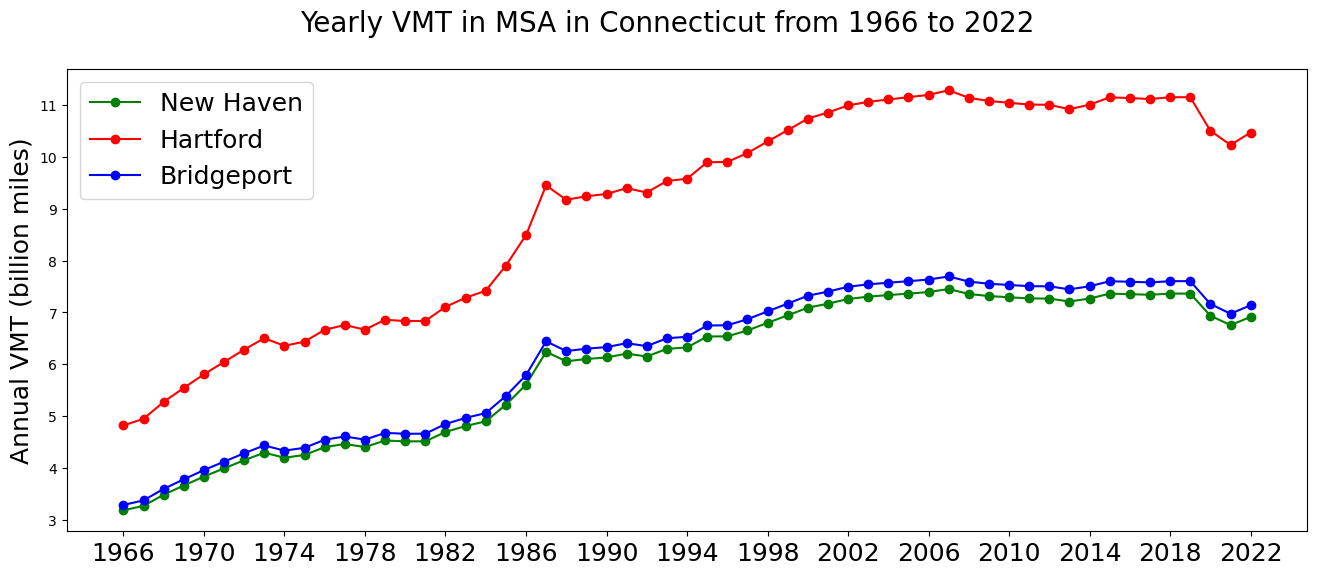

In [80]:
fig = plt.figure(figsize=(16,6))
fig.suptitle('Yearly VMT in MSA in Connecticut from 1966 to 2022',fontsize=20)
actual, = plt.plot(combined_year, vmt_NHM, 'go-', label='New Haven')
actual, = plt.plot(combined_year, vmt_HEM, 'ro-', label='Hartford')
actual, = plt.plot(combined_year, vmt_BSN, 'bo-', label='Bridgeport')
#plt.xlabel('Year',fontsize=18)
plt.ylabel('Annual VMT (billion miles)',fontsize=18)
plt.xticks(np.arange(min(combined_year), max(combined_year)+1, 4),fontsize=18)
plt.legend(fontsize=18)
#plt.savefig('images/avetemp.png',bbox_inches='tight')
# Save or display the plot
plt.savefig('../../../figures/CT-vmt-2022data-msa.png', dpi=600, bbox_inches='tight')